# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
    <ul>
      <li><a href="#quality">Quality issues</a></li>
      <li><a href="#tidiness">Tidiness issues</a></li>
    </ul>
<li><a href="#clean">Cleaning Data</a></li>
    <ul>
      <li><a href="#Q1">Quality issues</a></li>
        <ul>
          <li><a href="#1">Issue 1</a></li>
          <li><a href="#2">Issue 2</a></li>
          <li><a href="#3">Issue 3</a></li>
          <li><a href="#4">Issue 4</a></li>
          <li><a href="#5">Issue 5</a></li>
          <li><a href="#6">Issue 6</a></li>
          <li><a href="#7">Issue 7</a></li>
          <li><a href="#8">Issue 8</a></li>
        </ul>
    </ul>
    <ul>
      <li><a href="#T1">Tidiness issues</a></li>
        <ul>
          <li><a href="#T1">Issue 1</a></li>
          <li><a href="#T2">Issue 2</a></li>
        </ul>
    </ul>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analysis">Analyzing and Visualizing Data</a></li>
</ul>

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#This has been downloaded directly or it was provided .
import pandas as pd
tweet_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv).It was downloaded programmatically

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
image_prediction_df = pd.read_csv("image-predictions.tsv", sep='\t')
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). That downloaded via twitter API by Udacity was used as API permission was not provided by Twitter.

In [4]:
import json
tweet_data = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet_data.append(json.loads(line))

tweet_data_df = pd.DataFrame(tweet_data, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_data_df.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Data for Twitter data archive

#### Programmatically viewing the data for quality and tidiness issues

In [5]:
#Checking the quality and tidiness of the data programmatically
#Summary statistics
tweet_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
#sorting the twitter archive data to ascertain the outliers in the rating_numerator and rating_denominator
tweet_archive_df.sort_values(by='rating_numerator',ascending=False).head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [7]:
#Determing the info of the twitter archive data
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#To identiy null data in the dataset
tweet_archive_df.isnull().sum()   


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
#To identify the duplicate dataset
# tweet_archive_df.duplicated().sum()
# OR
sum(tweet_archive_df.duplicated())

0

In [10]:
#Summary statistics
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
#To identiy null data in the dataset
image_prediction_df.isnull().sum()   

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [12]:
#Determing the info of the image predcition data
image_prediction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
#checking for duplicates
sum(image_prediction_df.duplicated())

0

In [15]:
#Summary statistics to programmatically view the tweet dataset
tweet_data_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
#To identiy null data in the dataset
tweet_data_df.isnull().sum()  

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [17]:
#Determing the info of the image prediction data
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
#To check for duplicates in the dataset
sum(tweet_data_df.duplicated())

0

<a id='quality'></a>
### Quality issues
1. Remove all data  that  have non-null values for the retweeted_status_user_id.

2. Remove all data in which the in_reply_to_user_id is non-null value.

3. Incorrect dog name in enhanced twitter archive.

4. Replace all the None values with null or nan since they are actually no values

5. Delete or drop columns not needed for the analysis.

6. img_num of the twitter prediction data has wrong data type. It should be categorical because it is between 1 and 4 and it reflects most confident prediction.

7. The p1_conf, p2_conf, p3_conf should in percentages to correspond to the percentage confidence of the predictions

8. The p1_conf, p2_conf, p3_conf percentages should be in two decimal places

<a id='tidiness'></a>
### Tidiness issues
1. Timestamp consist of date and time which should be split into date and time. The date and time generated from the timestamp are in the wrong data type.

2. The twitter API data should be part of the enhanced twitter data. Hence, we join the data on the tweeter id


<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
tweet_archive_df_clean = tweet_archive_df.copy()
image_prediction_df_clean = image_prediction_df.copy()
tweet_data_df_clean = tweet_data_df.copy()


<a id='Q1'></a>
## Quality Issues

<a id='1'></a>
### Issue #1: Remove all data that have non-null values for the retweeted_status_user_id

#### Define: We only want original ratings (no retweets) that have images
> To solve this I would drop all the rows that have non-nan values for the retweeted_status_user_id

#### Code

In [20]:
#Query the data to remove rows that have non-nan values for retweeted_status_user_id
tweet_archive_df_clean = tweet_archive_df_clean[tweet_archive_df_clean['retweeted_status_user_id'].isna()]
tweet_archive_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True) 


#### Test

In [21]:
tweet_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


<a id='2'></a>
### Issue #2: Remove all data in which the in_reply_to_user_id is non-null value.

#### Define: We only want only dog ratings (no reply) 
> To solve this I would drop all the rows that have non-nan values for the in_reply_to_user_id

#### Code

In [22]:
#Query the data to remove rows that have non-nan values for retweeted_status_user_id
tweet_archive_df_clean = tweet_archive_df_clean[tweet_archive_df_clean['in_reply_to_user_id'].isna()]
tweet_archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True) 


#### Test

In [23]:
tweet_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


<a id='3'></a>
### Issue #3: Incorrect dog name in enhanced twitter archive.

#### Define: Correct the dog names that are incorrect 

> Visually checking the names column against names that are not noun

> Use value_counts to determine the names and its counts

> Identify non-noun words, mostly marked by starting with a lowercase character, that are not dog names and replace it with None

> Test for correctness

#### Code

In [24]:
#To identify incorrect names and duplicates names
tweet_archive_df_clean.name.value_counts()


None         603
a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
the            8
Sadie          8
Lola           8
Winston        8
Toby           7
Daisy          7
Bella          6
Bailey         6
an             6
Koda           6
Oscar          6
Bo             6
Jax            6
Stanley        6
Rusty          5
Louis          5
Dave           5
Scout          5
Leo            5
Milo           5
Chester        5
Bentley        5
            ... 
Koko           1
Lambeau        1
Pete           1
Beya           1
Autumn         1
Edgar          1
Laela          1
Rizzy          1
Jennifur       1
Lulu           1
Stewie         1
Anthony        1
Buckley        1
Enchilada      1
Godzilla       1
Aiden          1
Shooter        1
Dido           1
Grady          1
Bradley        1
Rumpole        1
Poppy          1
Crumpet        1
Bilbo          1
Jimbo          1
Mimosa         1
Huxley         1
Jordy         

In [25]:
tweet_archive_df_clean.head(2)
tweet_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [26]:
#I downloaded the cleaned twitter archive and manually corrected the wrong names identified the comments below:
# tweet_archive_df_clean.to_csv('clean_twitter_archive.csv', index=False)
#Manually checking the below items and correcting then reuploading it to dataframe
#      values == 'an' and idi == 668636665813057536:
#         new_names.append('Berta')
#      values == 'a' and idi == 666701168228331520:
#         new_names.append('Johm')
#      values == 'a' and idi == 666781792255496192:
#         new_names.append('Octaviath')
#      values == 'a' and idi == 666983947667116034:
#         new_names.append('Pepe')
#      values == 'a' and idi == 667177989038297088:
#         new_names.append('Daryl')
#      values == 'a' and idi == 667470559035432960:
#         new_names.append('Kohl')
#      values == 'a' and idi == 667538891197542400:
#         new_names.append('Klint')
#      values == 'a' and idi == 667773195014021121:
#         new_names.append('Jessiga')
#      values == 'a' and idi == 667861340749471744:
#         new_names.append('Cheryl')
#      values == 'a' and idi == 668171859951755264:
#         new_names.append('Alfonso')
#      values == 'a' and idi == 668507509523615744:
#         new_names.append('Chuk')
#      values == 'a' and idi == 668955713004314625:
#         new_names.append('Leroi')
#      values == 'a' and idi == 669564461267722241:
#         new_names.append('Alfredo')
#      values == 'a' and idi == 669923323644657664:
#         new_names.append('Alphred')
#      values == 'a' and idi == 670303360680108032:
#         new_names.append('Hemry')
#      values == 'a' and idi == 670361874861563904:
#         new_names.append('Cherokee')
#      values == 'a' and idi == 670427002554466305:
#         new_names.append('Spork')
#      values == 'a' and idi == 671147085991960577:
#         new_names.append('Rufus')
#      values == 'a' and idi == 671743150407421952:
#         new_names.append('Jacob')
#      values == 'a' and idi == 673636718965334016:
#         new_names.append('Kip')
#      values == 'a' and idi == 675706639471788032:
#         new_names.append('Wylie')    



In [27]:
#uploading it to the dataframe
import pandas as pd
import numpy as np
# reuploading the corrected data to dataframe
tweet_archive_df_clean_ = pd.read_csv('clean_twitter_archive.csv')
tweet_archive_df_clean_.name.value_counts()
#To check that the missing names reflect
tweet_archive_df_clean_[tweet_archive_df_clean_.name == 'Berta']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
#we have to replace 'a', 'the', 'an', 'such' etc with none since they are not true names for the dogs and then we retry it again 
#and sieve out incorrect names. I had to sort the dataset visually and programmatically to identify the names that are verbs and pronouns or
#parts of speech and not nouns or dog name
# tweet_archive_df_clean['name'] = tweet_archive_df_clean.name.replace({['a','the','an','such']:'None'})
replace_values = {'a' : 'None', 'the' : 'None', 'an' : 'None', 'such': 'None','actually': 'None',
                  'all': 'None','by': 'None', 'getting': 'None', 'his': 'Quizno', 'incredibly': 'None',
                 'infuriating': 'None','just': 'None','life': 'None','mad': 'None','my': 'Zoey','not': 'None',
                 'O': "O'Malley", 'old': 'None', 'one': 'None', 'quite': 'None'}
tweet_archive_df_clean_ = tweet_archive_df_clean_.replace({"name": replace_values})



#### Test

In [29]:
#testing for replaced values return an empty dataset which reflects that it has been corrected
tweet_archive_df_clean_[tweet_archive_df_clean_.name == 'one'] 


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
#testing for replaced values return an empty dataset which reflects that it has been corrected
tweet_archive_df_clean_[tweet_archive_df_clean_.name == 'infuriating']


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
#checking for dog name 'Berta' that was extracted from the text and used to replace 'a' the initial name 
tweet_archive_df_clean_[tweet_archive_df_clean_.name == 'Berta']


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
tweet_archive_df_clean_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


<a id='4'></a>
### Issue #4: Replace all the None values with null or nan since they are actually no values

#### Define: The 'None' values in the dataset does not reflect the true nature of the data which is null. Hence, we replace it with null


#### Code

In [33]:
#replacing 'None' values with nan since they are actually no names given for such dog columns
tweet_archive_df_clean_ = tweet_archive_df_clean_.replace({"None": np.nan})

#### Test

In [34]:
#checking sample to confirm that there is no 'None' values in the dataset
tweet_archive_df_clean_.name.value_counts()


Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Bailey        6
Bella         6
Stanley       6
Bo            6
Oscar         6
Jax           6
Koda          6
Buddy         5
Bentley       5
Chester       5
Scout         5
Rusty         5
Leo           5
Milo          5
Dave          5
Louis         5
Cassie        4
Winnie        4
Brody         4
             ..
Pete          1
Arnold        1
Beya          1
Mac           1
Claude        1
Gert          1
Autumn        1
Edgar         1
Stewie        1
Anthony       1
Buckley       1
Enchilada     1
Godzilla      1
Aiden         1
Shooter       1
Dido          1
Grady         1
Bradley       1
Rumpole       1
Poppy         1
Crumpet       1
Bilbo         1
Jimbo         1
Mimosa        1
Huxley        1
Jordy         1
Quinn         1
Rizzy         1
Laela         1
Odin          1
Name: name, Length: 936,

In [35]:
#checking sample to confirm that there is no 'None' values in the dataset
tweet_archive_df_clean_.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1136,703356393781329922,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,NaN,NaN,NaN,NaN
421,806629075125202948,2016-12-07 22:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,NaN,NaN,NaN,NaN,NaN
1936,668932921458302977,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He likes to swing. Subtle tong...,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,NaN,NaN,NaN,NaN
1652,674664755118911488,2015-12-09 18:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,NaN,NaN,NaN,NaN
1328,688547210804498433,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,NaN,NaN,NaN,NaN


<a id='5'></a>
### Issue #5: Delete or drop columns not needed for the analysis.

#### Define: For analysis to be sharp,clean and concise, I drop the 'source',  'expanded_urls', 'text', columns that is not useful for the analysis

#### Code

In [36]:
tweet_archive_df_clean_new = tweet_archive_df_clean_.drop(['source', 'expanded_urls', 'text', 'doggo', 'floofer', 'pupper','puppo'], axis=1)


#### Test

In [37]:
tweet_archive_df_clean_new.head()
tweet_archive_df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 5 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1401 non-null object
dtypes: int64(3), object(2)
memory usage: 82.0+ KB


<a id='6'></a>
### Issue #6: 'img_num' of the twitter prediction data has wrong data type. It should be categorical because it is between 1 and 4 and it reflects most confident prediction.

#### Define: Convert the datatype for 'img_num' to categorical datatype

#### Code

In [38]:
image_prediction_df_clean['img_num'] = image_prediction_df_clean['img_num'].astype('category')

#### Test

In [39]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


<a id='7'></a>
### Issue #7: The p1_conf, p2_conf, p3_conf should not be in decimal but percentages to correspond to the percentage confidence of the predictions

#### Define: Multiplying each of the column by 100 to make it into percenatges

#### Code

In [40]:
image_prediction_df_clean['p1_conf'] = image_prediction_df_clean['p1_conf'] * 100
image_prediction_df_clean['p2_conf'] = image_prediction_df_clean['p2_conf'] * 100
image_prediction_df_clean['p3_conf'] = image_prediction_df_clean['p3_conf'] * 100

#### Test

In [41]:
image_prediction_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8143,True,redbone,36.06870,True,miniature_pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311,True,Rottweiler,24.36820,True,Doberman,15.46290,True


<a id='8'></a>
### Issue #8: The p1_conf, p2_conf, p3_conf percentages should be in two decimal places

#### Define: Change the confidence interval to two decimal places

#### Code

In [42]:
image_prediction_df_clean['p1_conf'] = image_prediction_df_clean['p1_conf'].round(2)
image_prediction_df_clean['p2_conf'] = image_prediction_df_clean['p2_conf'].round(2)
image_prediction_df_clean['p3_conf'] = image_prediction_df_clean['p3_conf'].round(2)

#### Test

In [43]:
image_prediction_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


<a id='T9'></a>
## Tidiness Issues

<a id='T1'></a>
### Issue #1: Timestamp consist of date and time which should be split into date and time. The date and time generated from the timestamp are in the wrong data type.

#### Define:  
> Split the timestamp into two new columns of date and time

#### Code

In [44]:
tweet_archive_df_clean_new.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin


In [45]:
#splitting the timestamp
tweet_archive_df_clean_new[['date', 'time', '000']] = tweet_archive_df_clean_new['timestamp'].str.split(' ',n=-1, expand=True)

# #drop the 'timestamp' and '000' columns as they are no longer needed
tweet_archive_df_clean_new = tweet_archive_df_clean_new.drop(['timestamp','000'], axis = 1)


#change the date and time type to time dataframe
tweet_archive_df_clean_new["date"] = pd.to_datetime(tweet_archive_df_clean_new["date"])
tweet_archive_df_clean_new["time"] = tweet_archive_df_clean_new["time"].astype('datetime64[ns]')


In [46]:
tweet_archive_df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 6 columns):
tweet_id              2097 non-null int64
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1401 non-null object
date                  2097 non-null datetime64[ns]
time                  2097 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 98.4+ KB


#### Test

In [47]:

tweet_archive_df_clean_new.head()


,tweet_id,rating_numerator,rating_denominator,name,date,time
0,892420643555336193,13,10,Phineas,2017-08-01,2022-08-27 16:23:56
1,892177421306343426,13,10,Tilly,2017-08-01,2022-08-27 00:17:27
2,891815181378084864,12,10,Archie,2017-07-31,2022-08-27 00:18:03
3,891689557279858688,13,10,Darla,2017-07-30,2022-08-27 15:58:51
4,891327558926688256,12,10,Franklin,2017-07-29,2022-08-27 16:00:24


<a id='T2'></a>
### Issue #2: The twitter API data should be part of the prediction dataset 

#### Define: We join the twitter API data, and prediction dataset


#### Code

In [48]:
#remame id to tweet_id for API data
tweet_data_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)


In [49]:
tweet_archive_df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 6 columns):
tweet_id              2097 non-null int64
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1401 non-null object
date                  2097 non-null datetime64[ns]
time                  2097 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 98.4+ KB


In [50]:
# Your cleaning code here, merging tweet_archive_df_clean_new to image_prediction_df_clean
image_prediction_df_clean = pd.merge(image_prediction_df_clean, tweet_data_df_clean,  on=['tweet_id'], how='left')
image_prediction_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,61.91,False,bighorn,12.51,False,ram,7.47,False,341.0,517.0
328,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,pug,86.34,True,shopping_cart,12.57,False,Border_terrier,0.30,True,564.0,1389.0
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,71.04,True,Chihuahua,26.23,True,Cardigan,0.69,True,943.0,3707.0
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,89.19,True,goose,1.44,False,fur_coat,0.85,False,2659.0,6776.0
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,61.07,True,muzzle,13.21,False,American_Staffordshire_terrier,10.95,True,4121.0,19447.0
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,96.05,True,Pomeranian,1.22,True,white_wolf,0.48,False,2412.0,7443.0
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,97.38,True,collie,2.52,True,Border_collie,0.03,True,3168.0,10895.0
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,43.06,True,golden_retriever,26.36,True,Great_Pyrenees,17.94,True,3081.0,18310.0
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,11.69,True,seat_belt,10.75,False,Australian_terrier,9.98,True,2042.0,8472.0
1047,713177543487135744,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,whippet,73.42,True,basenji,2.59,True,Great_Dane,2.59,True,3183.0,7854.0


#### Test

In [51]:
twitter_archive_master = image_prediction_df_clean
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null category
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null bool
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null bool
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null bool
retweet_count     2073 non-null float64
favorite_count    2073 non-null float64
dtypes: bool(3), category(1), float64(5), int64(1), object(4)
memory usage: 186.6+ KB


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
twitter_archive_master.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2073.000000,2073.000000
mean,7.384514e+17,59.454945,13.458877,6.032323,2976.089243,8556.718283
std,6.785203e+16,27.117343,10.066685,5.090477,5054.897526,12098.640994
min,6.660209e+17,4.430000,0.000000,0.000000,16.000000,0.000000
25%,6.764835e+17,36.440000,5.390000,1.620000,634.000000,1674.000000
50%,7.119988e+17,58.820000,11.820000,4.940000,1408.000000,3864.000000
75%,7.932034e+17,84.385000,19.560000,9.180000,3443.000000,10937.000000
max,8.924206e+17,100.000000,48.800000,27.340000,79515.000000,132810.000000


### What name would you popularly give a dog?
> Lucy and Charlie are the most popular name of dog. Hence, I would name my female dog Lucy and male dog Charlie based on popular names in the dataset

In [54]:
#Based on the tweeter archive dataset, the most popular name is Lucy
tweet_archive_df_clean_new['name'].value_counts()


Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Bailey        6
Bella         6
Stanley       6
Bo            6
Oscar         6
Jax           6
Koda          6
Buddy         5
Bentley       5
Chester       5
Scout         5
Rusty         5
Leo           5
Milo          5
Dave          5
Louis         5
Cassie        4
Winnie        4
Brody         4
             ..
Pete          1
Arnold        1
Beya          1
Mac           1
Claude        1
Gert          1
Autumn        1
Edgar         1
Stewie        1
Anthony       1
Buckley       1
Enchilada     1
Godzilla      1
Aiden         1
Shooter       1
Dido          1
Grady         1
Bradley       1
Rumpole       1
Poppy         1
Crumpet       1
Bilbo         1
Jimbo         1
Mimosa        1
Huxley        1
Jordy         1
Quinn         1
Rizzy         1
Laela         1
Odin          1
Name: name, Length: 936,

### Why are there so many pupper as a dog stage in the dataset?
> It is because many dog owners like to call their dogs “my sweet beautiful little pupper” even when they have far outgrown puppyhood.

In [55]:
#Why there is pupper is most common of the dog stages in the dataset
tweet_archive_df_clean_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1401 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


In [56]:
twitter_archive_master.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2073.000000,2073.000000
mean,7.384514e+17,59.454945,13.458877,6.032323,2976.089243,8556.718283
std,6.785203e+16,27.117343,10.066685,5.090477,5054.897526,12098.640994
min,6.660209e+17,4.430000,0.000000,0.000000,16.000000,0.000000
25%,6.764835e+17,36.440000,5.390000,1.620000,634.000000,1674.000000
50%,7.119988e+17,58.820000,11.820000,4.940000,1408.000000,3864.000000
75%,7.932034e+17,84.385000,19.560000,9.180000,3443.000000,10937.000000
max,8.924206e+17,100.000000,48.800000,27.340000,79515.000000,132810.000000


In [66]:
#Based on the summary statistics above, determining the image prediction using the 95% and above confidence interval to determine how close it aligns with first image
twitter_archive_master_95 = twitter_archive_master[twitter_archive_master['p1_conf'] >= 95]


In [67]:
#determing the image prediction using the 20% and above confidence interval to determine how close it aligns with second image
twitter_archive_master_20 = twitter_archive_master[twitter_archive_master['p2_conf'] >= 20]


In [68]:
#determing the image prediction using the 20% and above confidence interval to determine how close it aligns with second image
twitter_archive_master_10 = twitter_archive_master[twitter_archive_master['p3_conf'] >= 10]


### Insights:
1. Lucy and Charlie are the most popular names of dog.

2. Most people like to call their dogs pupper because they still view them as small puppies despite outgrowing the stage.

3. As we progress through the images from the first image down to the third image and as the confidence interval reduces per prediction, we observe that the image is less likely to be that of a dog. Hence, we could conclude, that the confidence interval helps the neural network predict the image accordingly


### Visualization

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
def conf_image(x,y,data):
    sns.swarmplot(x, y , data=twitter_archive_master, size=8);
    plt.title('Confidence interval against Image prediction');
    plt.xlabel('image number')
    plt.ylabel('Confidence Interval(%)')
    plt.legend()

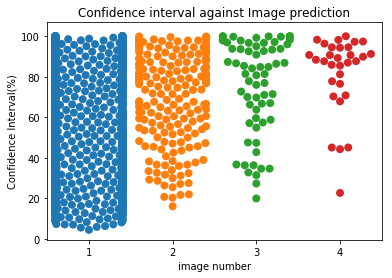

In [79]:
#Visualizing the confidence interval at 95% and above against the image number
conf_image("img_num", "p1_conf",data=twitter_archive_master_95)


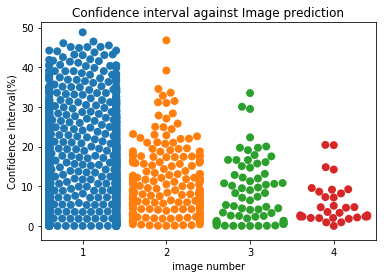

In [80]:
#Visualizing the confidence interval at 20% and above against the image number
conf_image("img_num", "p2_conf",data=twitter_archive_master_20)

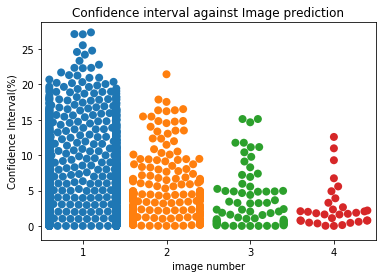

In [81]:
#Visualizing the confidence interval at 10% and above against the image number
conf_image("img_num", "p3_conf",data=twitter_archive_master_10)